# EDA Assignment #1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Latar Belakang**

[Dataset](https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv) merupakan data mobil bekas yang terdapat di India yang terdiri dari 6019 baris dan 12 kolom meliputi:
* Name - Nama merek dan model mobil 
* Location - Lokasi mobil dijual 
* Year - Tahun edisi mobil 
* Kilometers_Driven - Total jarak pemakaian mobil oleh pengguna sebelumnya dalam satuan kilometer 
* Fuel_Type - Tipe bahan bakar yang digunakan mobil (Petrol/Diesel/Electric/CNG/LPG) 
* Transmission - Tipe transmisi yang digunakan mobil (Automatic/Manual) 
* Owner_Type - Jenis kepemilikan mobil (First/Second/Third/Fourth & Above) 
* Mileage - Tingkat konsumsi bahan bakar dalam satuan kmpl atau km/kg 
* Engine - Kapasitas mesin mobil dalam satuan CC 
* Power - Tenaga maksimum dari mesin mobil dalam satuan bhp 
* Seats - Jumlah kursi pada mobil 
* Price - Harga mobil bekas dalam satuan INR Lakhs (Indian Rupee) 

In [2]:
df = pd.read_csv('used_car_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek
tersebut?**

In [3]:
Merek = df['Name'].apply(lambda x: x.split()[0].capitalize())
Merek = Merek.replace({'Mini':'Mini Cooper','Land':'Land Rover','Bmw':'BMW'})

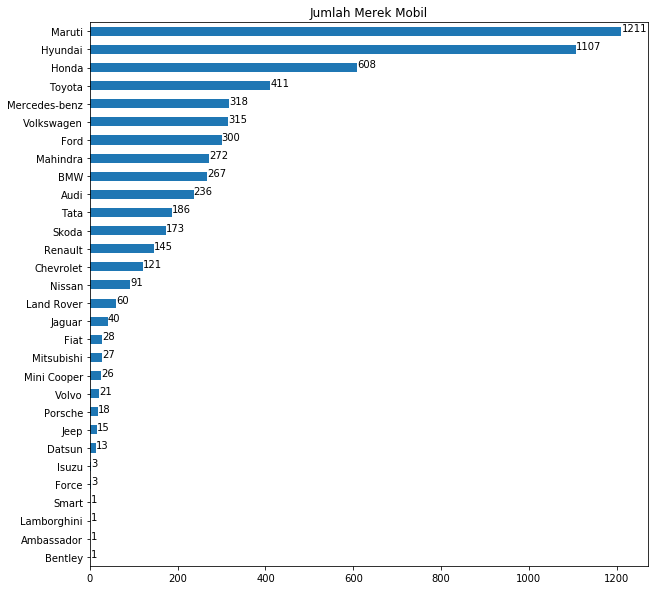

In [4]:
plt.figure(figsize=(10,10))
Merek.value_counts().sort_values().plot.barh(title='Jumlah Merek Mobil')
for index, value in enumerate(Merek.value_counts().sort_values()):
    plt.text(value, index, str(value))   

**2. Kota apa yang memiliki mobil bekas paling banyak?**

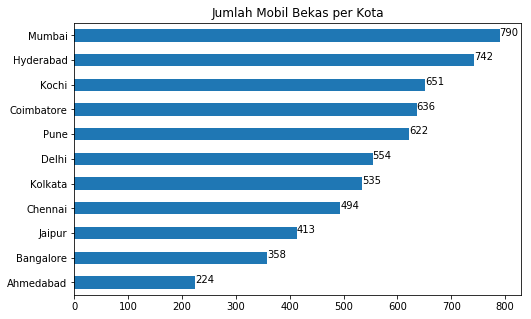

In [5]:
plt.figure(figsize=(8,5))
df['Location'].value_counts().sort_values().plot.barh(title='Jumlah Mobil Bekas per Kota')
for index, value in enumerate(df['Location'].value_counts().sort_values()):
    plt.text(value, index, str(value))  

**3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?**

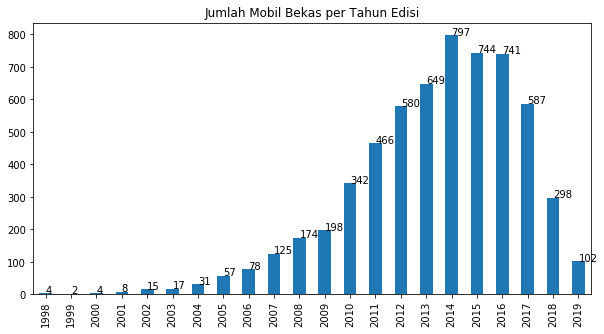

In [6]:
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot.bar(title='Jumlah Mobil Bekas per Tahun Edisi')
for index, value in enumerate(df['Year'].value_counts().sort_index()):
    plt.text(index, value, str(value))  

**4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?**

In [7]:
print(sum(df['Kilometers_Driven']<100000),'Mobil')

5470 Mobil


**5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah
atau tinggi? Sertakan argumen yang mendukung jawaban.**

34000.0 73000.0


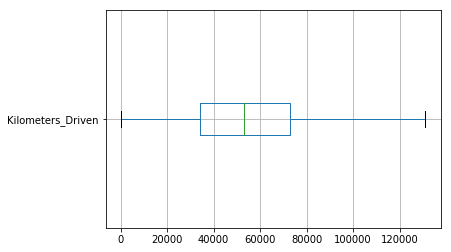

In [8]:
print(np.percentile(df['Kilometers_Driven'],25),np.percentile(df['Kilometers_Driven'],75))
df.boxplot('Kilometers_Driven',vert=False,showfliers=False)

Dengan munggunakan *boxplot* sebagai patokan, bisa disimpulkan kilometer total jarak pemakaian diluar *Interquartile Range* (± 34000-73000 km) dikategorikan rendah atau tinggi.

**6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang
mendukung jawaban.**

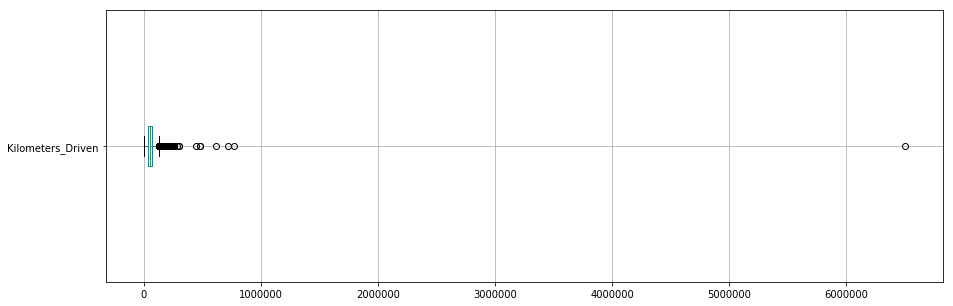

In [9]:
plt.figure(figsize=(15,5))
df.boxplot('Kilometers_Driven',vert=False)

Dengan munggunakan *boxplot* sebagai patokan, terdapat banyak *outlier* bahkan ada satu *outlier* yang sangat ekstrem dengan total jarak pemakaian melebihi 6000000 km.

**7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan
argumen yang mendukung jawaban.**

PCC: -0.5008723632037196


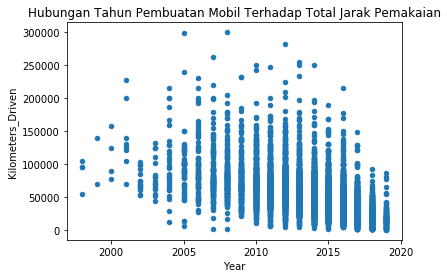

In [10]:
dfo = df[df['Kilometers_Driven']<400000]
print('PCC:',dfo['Kilometers_Driven'].corr(dfo['Year']))
dfo.plot.scatter('Year','Kilometers_Driven', title='Hubungan Tahun Pembuatan Mobil Terhadap Total Jarak Pemakaian')

Dengan mengeleminasi *outlier* yang ekstrem, terdapat korelasi negatif yang moderat antara Tahun Pembuatan Mobil dan Total Jarak Pemakaian Mobil dengan Koefisien Korelasi Pearson ±0.5.

**8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?**

In [11]:
print(sum(df['Owner_Type']=='Third')+sum(df['Owner_Type']=='Fourth & Above'),"Mobil")

122 Mobil


**9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?**

In [12]:
no9 = df[['Fuel_Type','Mileage']].dropna()
no9['Mileage'] = no9['Mileage'].apply(lambda x: float(x.split()[0]))
no9 = no9.groupby('Fuel_Type').agg(np.mean).sort_values(by='Mileage')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

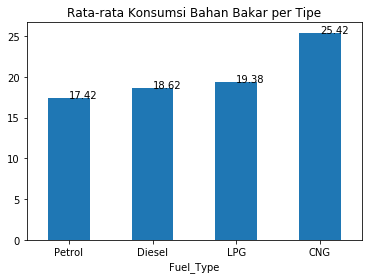

In [13]:
plt.figure(figsize=(10,5))
no9.plot.bar(title='Rata-rata Konsumsi Bahan Bakar per Tipe',legend=False)
for index, value in enumerate(no9['Mileage']):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=0)  

**10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan
argumen yang mendukung jawaban.**

In [14]:
no10 = df.copy()
no10[['Mileage','Engine']] = no10[['Mileage','Engine']].applymap(lambda x: np.nan if x is np.nan else float(x.split()[0]))
numeric_df = no10.select_dtypes(include=['integer','float'])
non_numeric_df = no10.drop(numeric_df.columns,1)
for col in non_numeric_df.columns:
    no10[col] = no10[col].astype("category")
    no10[col] = no10[col].cat.codes

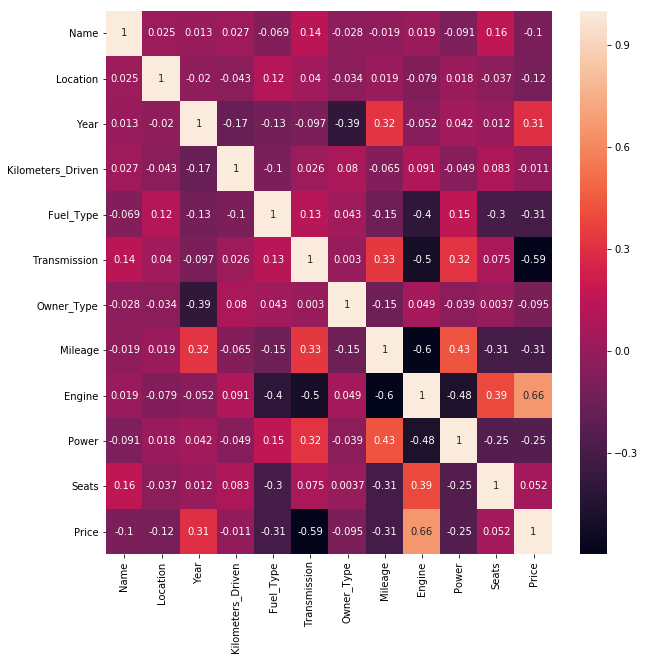

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(no10.corr(),annot=True)

Dengan menggunakan korelasi dari *heatmap*, secara sekilas faktor-faktor yang mempunyai pengaruh moderat terhadap harga mobil bekas adalah Tipe Transmisi (*Automatic/Manual*) dan Kapasitas Mesin Mobil (*Engine*).

**Insight #1 Merek dengan rata-rata harga termahal**

In [16]:
i1 = df.copy()
i1['Merek'] = Merek
i1 = i1[['Price','Merek']].groupby('Merek').agg(np.mean).sort_values(by='Price')

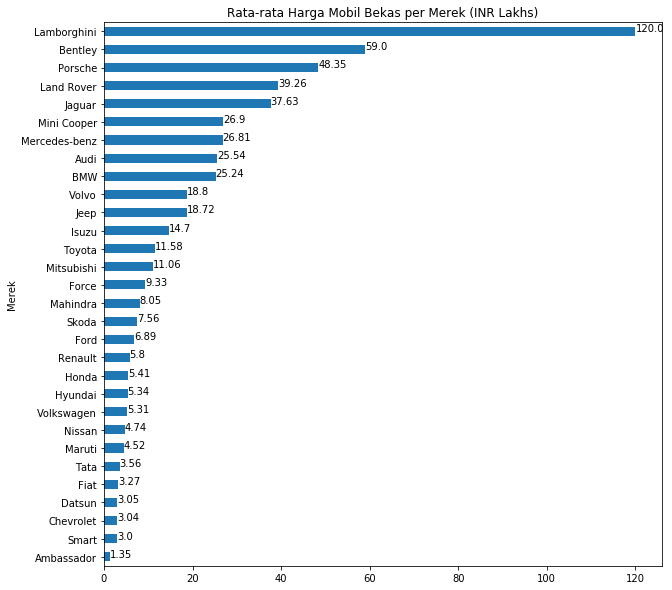

In [17]:
i1.plot.barh(title='Rata-rata Harga Mobil Bekas per Merek (INR Lakhs)', legend=False)
for index, value in enumerate(i1['Price']):
    plt.text(value, index, str(round(value,2))) 
plt.gcf().set_size_inches(10, 10)   

**Insight #2 Sebaran jumlah kursi mobil pada mobil bekas**

In [18]:
dit = df['Seats'].value_counts(normalize=True)
i2 = df['Seats'].dropna().apply(lambda x: 'Others' if dit[x]<0.01 else str(int(x))+' seats')

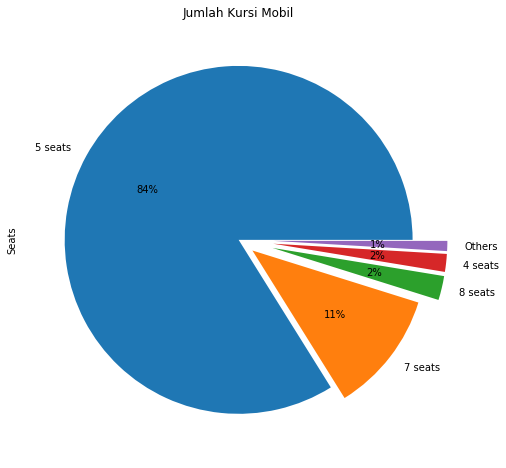

In [19]:
plt.figure(figsize=(8,8))
i2.value_counts().plot.pie(autopct='%1.0f%%',title='Jumlah Kursi Mobil',explode=(0,0.1,0.2,0.2,0.2))

**Insight #2 Sebaran Tipe Bahan Bakar Mobil Bekas per Tahun Edisi**

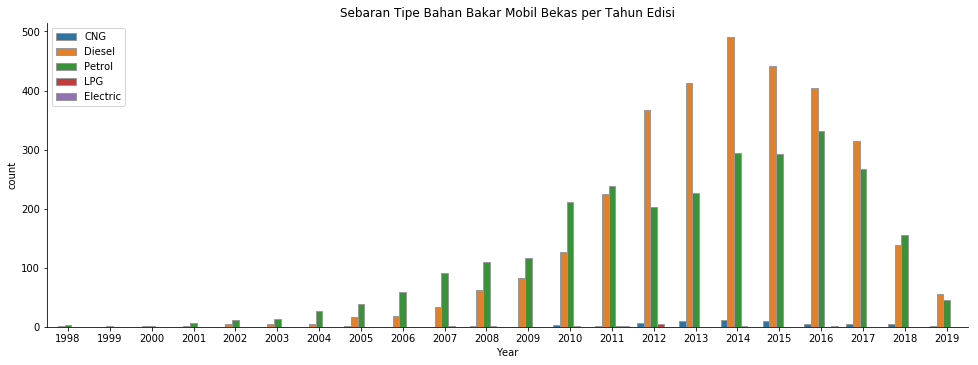

In [20]:
title = 'Sebaran Tipe Bahan Bakar Mobil Bekas per Tahun Edisi'
sns.catplot(x="Year", hue="Fuel_Type", kind="count", edgecolor=".6",data=df, legend=False).set(title = title)
plt.legend(loc='upper left')
plt.gcf().set_size_inches(15, 5)   

Dari grafik diatas, Rata-rata tipe bahan bakar yang banyak digunakan adalah *Petrol* dan juga *Diesel* yang mulai mendominasi di tahun 2012 hingga 2017.